In [1]:
import os, sys, glob, pylab as pl, h5py, pdb
#from importlib import reload
sys.path.append('./pysrc_new/')
sys.path.append('./forCHIMES/')
import numpy as np
from numpy import log10 as log
from astropy import units as un, constants as cons
import parameters as param
import RPC_Hydro as proj
import plots

In [2]:
# fn_abundances = proj.rpc_hydro_dir+'forCHIMES/eqm_external_shielding_table_abundances_%s0s.hdf5'%sim_prefix
fn_abundances = proj.rpc_hydro_dir+'forCHIMES/eqm_external_shielding_table_abundances.hdf5'
fn_static_solution = proj.rpc_hydro_dir+'forCHIMES/static_solution.npz'
f_abundances = h5py.File(fn_abundances,'r')

In [3]:
sim_resolution = '1024'
sim_prefix = '650'
sim_suffix = 'D'
lum = 2.5e12 * un.Lsun.to('erg/s')
name = 'B2D_N%s_R100_%s%s'%(sim_resolution,sim_prefix,sim_suffix)
sim_data_name = proj.runsDir+name+'/data/'
nSnapshots = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_name+'prs*')])
qRP = proj.Run(name,nSnapshots,r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lum,optFrac=param.ion_fraction,
              f_abundances=f_abundances)
print(nSnapshots)

14


In [7]:
pl.rcParams['text.usetex']=False

In [5]:
sim_resolution = '1024' #'512'
sim_prefix = '601'#'501'#'421'
sim_suffix = 'D'#'V' #'D'
lum = 2.5e9 * un.Lsun.to('erg/s')
name = 'B2D_N%s_R100_%s%s'%(sim_resolution,sim_prefix,sim_suffix)
sim_data_name = proj.runsDir+name+'/data/'
nSnapshots = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_name+'prs*')])
qGP = proj.Run(name,nSnapshots,r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lum,optFrac=param.ion_fraction,
              f_abundances=f_abundances)
print(nSnapshots)

400


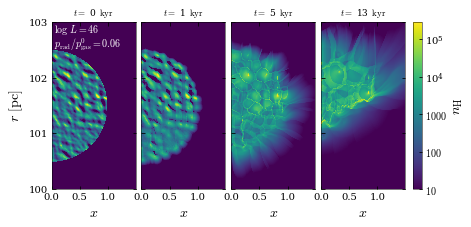

In [24]:
#reload(plots); plots.labelsize(False)
iSnapshots = [0,1,5,13]
cb = plots.sim_evolution((qRP,),iSnapshots,'nH',rng=(10,3e5),cmap=plots.density_cmap)    
pl.savefig(plots.figdir+'density_evolution_%s.png'%qRP.name,dpi=300,bbox_inches='tight')

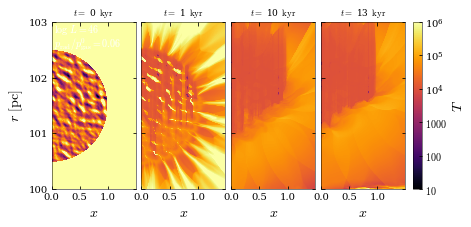

In [10]:
#reload(plots); 
plots.labelsize(False)
iSnapshots = [0,1,10,13]
cb = plots.sim_evolution((qRP,),iSnapshots,'T',rng=(10,1e6),cmap=plots.temperature_cmap)    
#pl.savefig(plots.figdir+'temperature_evolution.png',dpi=300,bbox_inches='tight')

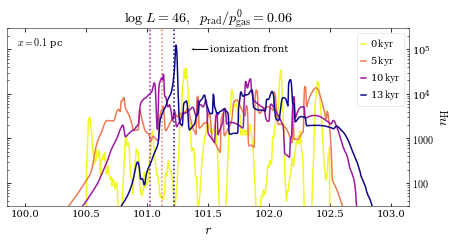

In [11]:
#reload(plots)
iSnapshots = [0,5,10,13]
ix = 17
plots.skewers((qRP,),'r',('nH',),rngs=((30,3e5),(3e4,1e10)), iTs=iSnapshots,ix=ix)
#pl.savefig(plots.figdir+'skewers_vs_dr.pdf',bbox_inches='tight')

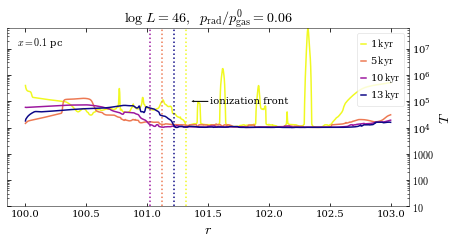

In [12]:
#reload(plots)
iSnapshots = [1,5,10,13]
ix = 17
plots.skewers((qRP,),'r',('T',),rngs=((10,1e7)), iTs=iSnapshots,ix=ix)
#pl.savefig(plots.figdir+'skewers_vs_dr_T_%s.pdf'%sim_suffix,bbox_inches='tight')

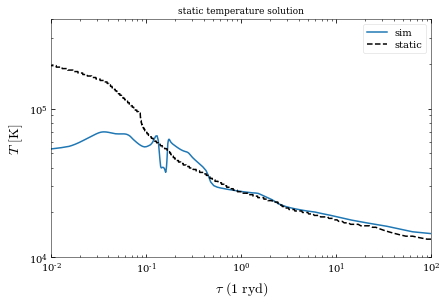

In [14]:
static_solution = np.load(fn_static_solution)
#pl.loglog(static_solution['taus'],static_solution['Ts'])
pl.title('static temperature solution')
pl.xlabel(r'$\tau\ (1\ {\rm ryd})$')
pl.ylabel(r'$T\ [{\rm K}]$')
pl.xlim(0.01,100)
pl.gca().xaxis.set_major_formatter(plots.arilogformatter)
run = qRP; iT = 13; ix = 17
taus = run[iT].tau_HI.cgs()[:,ix] + run[iT].tau_dust.cgs()[:,ix]
Ts = run[iT].T.cgs()[:,ix]
pl.plot(taus, Ts,label='sim')
pl.loglog(static_solution['NHIs']*param.sigma_HI_one_rydberg
          +static_solution['NHs']*param.sigma_dust_one_rydberg,static_solution['Ts'],ls='--',c='k',label='static')
pl.ylim(1e4,4e5)
pl.legend()

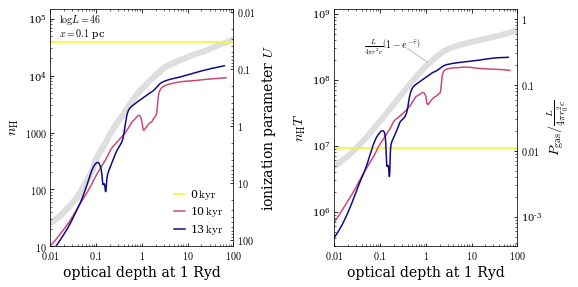

In [22]:
reload(plots)
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
plots.comparison_to_static_solution_by_time(
    qRP,iTs=(0,10,13),var=('nH','nHT'),ix=ix,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_time_%s.pdf'%qRP.name,bbox_inches='tight')

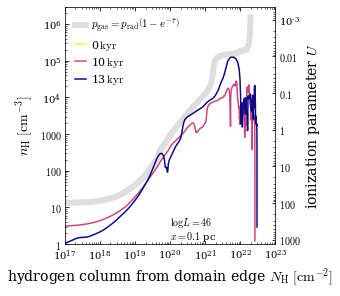

In [20]:
reload(plots)
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
plots.comparison_to_static_solution_by_time_vs_NH(
    qRP,iTs=(0,10,13,),var='nH',rng=(10,1.5e5),ix=ix,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_time_vs_NH_%s.pdf'%qRP.name,bbox_inches='tight')

In [ ]:
sim_resolution = '1024'
sim_prefix = '420'
sim_suffix = 'D'
lum = 2.5e12 * un.Lsun.to('erg/s')
name = 'B2D_N%s_R100_%s%s'%(sim_resolution,sim_prefix,sim_suffix)
sim_data_name = proj.runsDir+name+'/data/'
nSnapshots = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_name+'prs*')])
qRP_highres = proj.Run(name,nSnapshots,r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lum,optFrac=param.ion_fraction,
              f_abundances=f_abundances)
print(nSnapshots)

In [30]:
reload(plots)
tables_oxygen = plots.IonizationTables(f_abundances,'O',8)
tables_iron = plots.IonizationTables(f_abundances,'Fe',26)

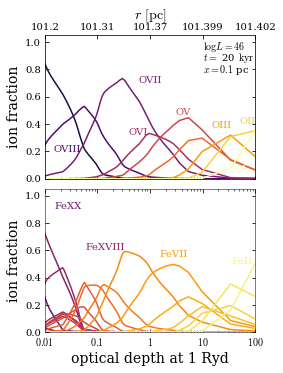

In [31]:
reload(plots)
iT=20
plots.plotIonizationStatesSim(qRP,iT,17,tables_oxygen,tables_iron)
#factor 2 fixed with qRP_highres for some reason

[1.0e+01 1.5e+05]
(10.0, 150000.0)


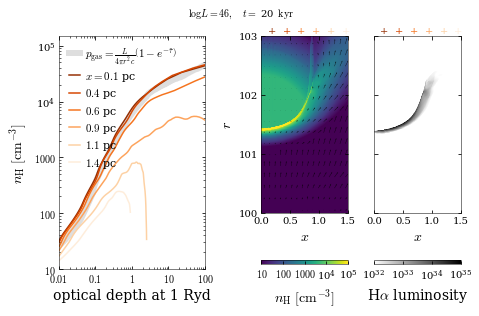

In [33]:
reload(plots)
plots.labelsize(False)
plots.comparison_to_static_solution_by_x(
    qRP,iT=20,var='nH',rng=(10,1.5e5),
    ixs=np.array([75,250,425,600,775,950])//2,dx=10,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_x_%s.png'%qRP.name,dpi=300,bbox_inches='tight')

# load different L and r sims

In [37]:
lums = np.array([2.5]*7+[7.5]*3) * 10.**np.array([12,9,10,11,13,8,14,12,11,10])*un.Lsun.to('erg/s')
names = ['B2D_N%s_R100_%s%d%s'%(sim_resolution,sim_prefix[:-1],i,sim_suffix) for i in range(len(lums))]
sim_data_names = [proj.runsDir+names[i]+'/data/' for i in range(len(lums))]

In [39]:
names

['B2D_N1024_R100_600D',
 'B2D_N1024_R100_601D',
 'B2D_N1024_R100_602D',
 'B2D_N1024_R100_603D',
 'B2D_N1024_R100_604D',
 'B2D_N1024_R100_605D',
 'B2D_N1024_R100_606D',
 'B2D_N1024_R100_607D',
 'B2D_N1024_R100_608D',
 'B2D_N1024_R100_609D']

In [40]:
sim_data_names = np.array(sim_data_names)[lums.argsort()].tolist()
names = np.array(names)[lums.argsort()].tolist()

In [41]:
lums = np.sort(lums)

In [42]:
nSnapshots = [None]*len(lums)
for i in range(len(lums)):
    if os.path.exists(sim_data_names[i]):
        nSnapshots[i] = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_names[i]+'prs*')])

In [43]:
sim_data_names

['/home/jonathan/simulations/B2D_N1024_R100_605D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_601D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_602D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_609D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_603D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_608D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_600D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_607D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_604D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_606D/data/']

In [44]:
nSnapshots

[400, 400, 400, None, 400, None, 50, None, None, None]

In [48]:
reload(proj)
qs = [proj.Run(names[i],nSnapshots[i],r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lums[i],optFrac=param.ion_fraction,
              f_abundances=f_abundances) for i in range(len(lums)) if os.path.exists(sim_data_names[i])]
print(['%.1f'%log(q.LAGN) for q in qs])

['42.0', '43.0', '44.0', '45.0', '46.0']


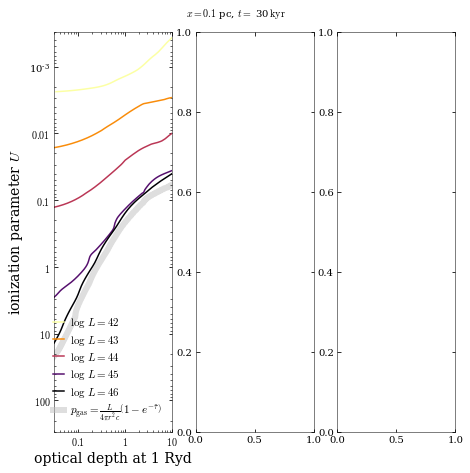

In [54]:
reload(plots)
plots.runsDir = '/home/jonathan/research/otherComputers/jose/simulations'

fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
plots.comparison_to_static_solution_by_radius(
    qs,[],[],iT=30,var='nH',rng=(10,1.5e5),ix=ix,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_luminosity_and_radius.pdf',bbox_inches='tight')

In [118]:
sim_resolution = '1024'
sim_prefix = '420D'
Rs = 100,300,600,1000,3000,6000,10000
names = ['B2D_N%s_R%d_420D'%(sim_resolution,R) for R in Rs]
sim_data_names = [proj.runsDir+names[i]+'/data/' for i in range(len(names))]
qs2 = [proj.Run(names[i],21,r=R,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=9.570e+45,optFrac=param.ion_fraction,
              f_abundances=f_abundances) for i,R in enumerate(Rs) if os.path.exists(sim_data_names[i])]


In [119]:
print(['%.1f'%log(q.r0) for q in qs2])

['20.5', '21.0', '21.3', '21.5', '22.0', '22.3', '22.5']


loading snapshot #20
loading snapshot #20


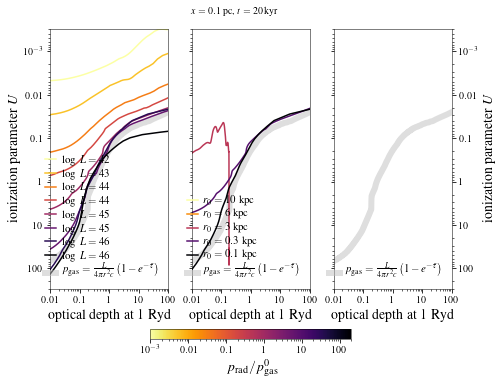

In [130]:
reload(plots)
plots.runsDir = '/home/jonathan/research/otherComputers/jose/simulations'

fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
plots.comparison_to_static_solution_by_radius(
    qs,qs2[::-1][:3]+qs2[::-1][5:],[],iT=20,var='nH',rng=(10,1.5e5),ix=ix,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_luminosity_and_radius.pdf',bbox_inches='tight')

IndexError: list index out of range

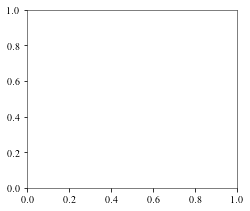

In [14]:
reload(plots)
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
plots.comparison_to_static_temperature_solution(
    qRP,iT=30,ix=10,
    static_solution_fn=fn_static_solution)
pl.xlim(0.001,100)

In [84]:
reload(plots)
iSnapshots = [0,2,5,10]
cb = plots.sim_evolution(sqs,iSnapshots,'nH',rng=(10,1.5e5),cmap=plots.density_cmap)    


loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5


(10, 1000000.0)

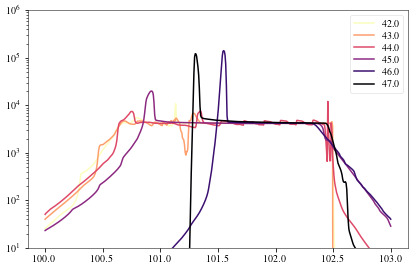

In [85]:
ix=10
for iq,run in enumerate(sqs):
    iT = (20,5)[iq==5]
    pl.plot(run[iT]['r'].cgs(),
            run[iT]['nH'].cgs()[:,ix],label='%.1f'%log(run.LAGN),c=plots.luminosity_cmap(iq/5))
pl.semilogy()
pl.legend()
pl.ylim(10,1e6)

In [10]:
qs = [proj.Run(names[i],nSnapshots[i]+1,r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lums[i],optFrac=param.ion_fraction,
              f_abundances=f_abundances) for i in range(len(lums))[:] if os.path.exists(sim_data_names[i])]


In [11]:
nSnapshots

[20, 20, 20, 20, 20, 20, 9, 9, None, None]

In [41]:
reload(proj)
iT = 9
res = proj.r_dependence_calc(qs,iTs=[iT])
# u.send(res,'pyobjs/dependence_on_r_new.pyobj')

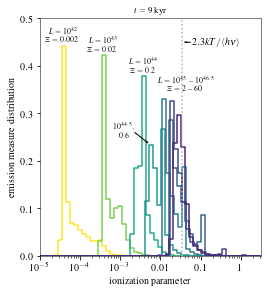

In [42]:
reload(plots)
plots.L_dependence_figs(qs,res,
                      save=False,
                     norm_by_Lbol=False,iT0=iT)
pl.savefig(plots.figdir+'luminosity_weighted_U.pdf',bbox_inches='tight')

In [44]:
sqs = sorted(qs, key=lambda r: r.LAGN)
for iq,q in enumerate(sqs):
    c = plots.time_cmap(iq/4)
    snapshot = q[10]
    for iPanel in range(2):
        ax = pl.subplot(2,1,iPanel+1)
        if iPanel==0:
            pl.plot(snapshot.x.cgs(),snapshot.LOIII.cgs().sum(axis=0)/snapshot.LHb.cgs().sum(axis=0),c=c,label=r'$L=%.0f$'%log(q.LAGN))
            pl.legend()
            pl.axhline(snapshot.LOIII.cgs().sum()/snapshot.LHb.cgs().sum(),c=c,ls='--')
            pl.semilogy()
        if iPanel==1:
            pl.plot(snapshot.x.cgs(),snapshot.LHb.cgs().sum(axis=0)/snapshot.LHb.cgs().sum(axis=0)[80] * 10,c=c)            
        pl.xlabel(r'x [pc]')        
        pl.ylim(0.1,30)
        

/home/jonathan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


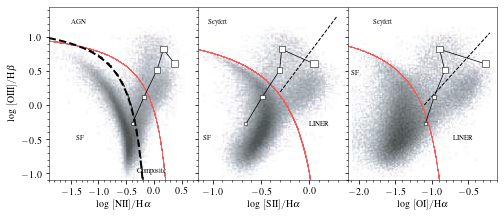

In [19]:
reload(plots)
plots.BPTplot_byL(qs)
pl.savefig(plots.figdir+'BPT.png',bbox_inches='tight',dpi=600)